# Notes for Chapter 9:

# Plotting and Visualization

Making informative visualizations (sometimes called plots) is one of the most important tasks in data analysis. matplotlib is a desktop plotting package designed for creating (mostly two dimensional) publication-quality plots.

The simplest way to learn code example in matplotlib is to use interactive plotting in the Jupyter Notebook.  To set this up, execute the following statement in a Jupyter notebook:

In [1]:
%matplotlib notebook

***

## 9.1 A Brief matplotlib API Primer

To use matplotlib, we use the following import convention as standard pratice and alias:

In [2]:
import matplotlib.pyplot as plt

Now, getting started with matplotlib with a simple plot set up.

In [3]:
import numpy as np

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


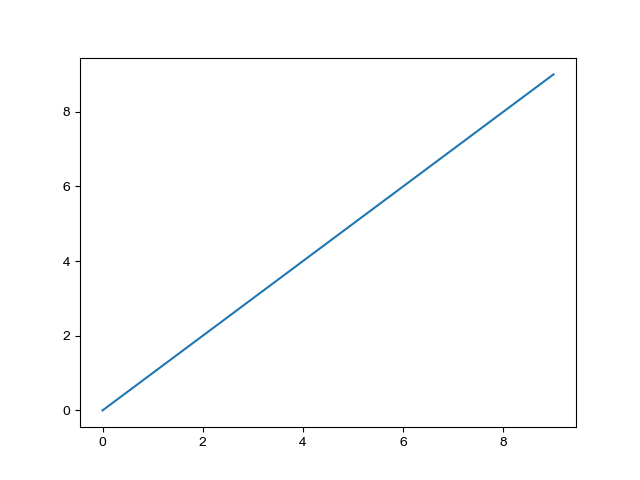

In [6]:
plt.plot(data)

### Figures and Subplots

Plots  in matplotlib reside within a Figure object. we can create a figure object with __plt.figure__:

But, we cant present a plot with a blank figure. so, lets add few subplots using __add_subplot__

<IPython.core.display.Javascript object>


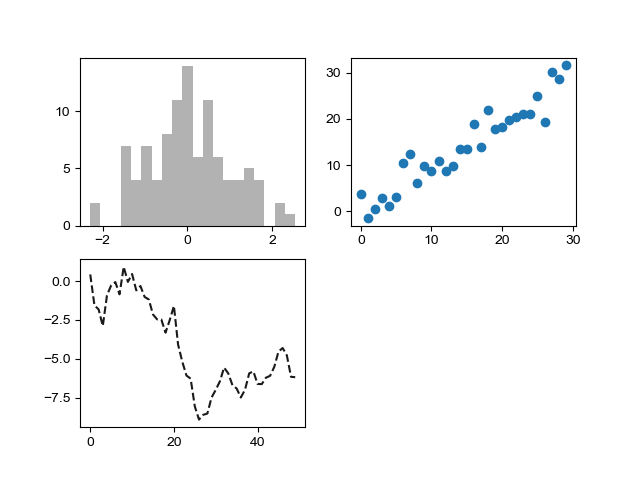

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re
selecting the first of four subplots (numbered from 1).

When we issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation

In [8]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

The 'k--' is a style option instructing matplotlib to plot a black dashed line. The objects returned by fig.add_subplot here are AxesSubplot objects, on which we can directly plot on the other empty subplots by calling each one’s instance method:

In [9]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [10]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

These Plots are displayed in the figure 2 above previously created.

Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects

<IPython.core.display.Javascript object>


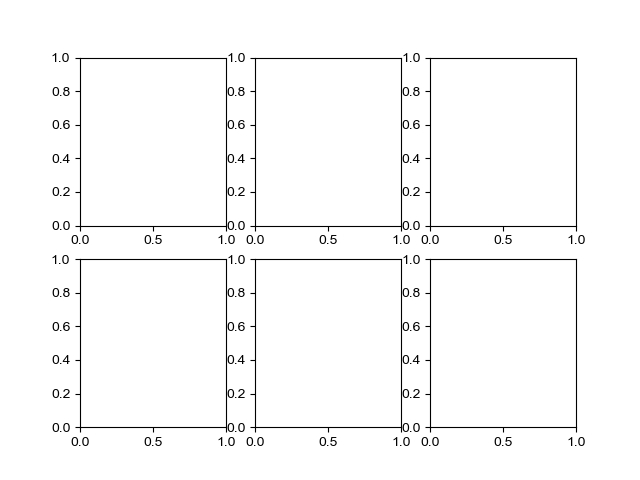

In [11]:
fig, axes = plt.subplots(2, 3)

In [12]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

This is very useful, as the axes array can be easily indexed like a two-dimensional array; for example, axes[0, 1]

we can also indicate that subplots should have the same x- or y-axis using __sharex__ and __sharey__, respectively. This is especially useful when we’re comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently. 

#### Adjusting the Spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if we resize the plot either programmatically or
manually using the GUI window, the plot will dynamically adjust itself.

We can change the spacing using the __subplots_adjust__ method of Figure objects, also available as a top-level function:

In [13]:
#syntax:

#
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#

__wspace__ and __hspace__ controls the percent of the figure width and figure height, respectively, to use as spacing between subplots.

<IPython.core.display.Javascript object>


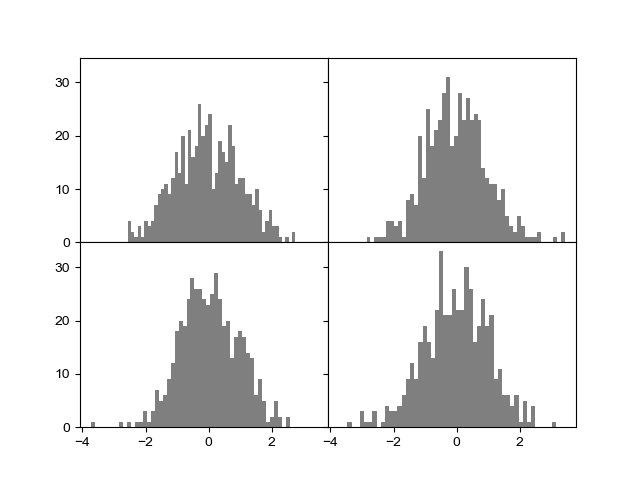

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [15]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

Note: the plots are always displayed on the last subplot on the last figure created and accordingly.

### Colors, Markers and Line Styles

Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a
string abbreviation indicating color and line style. For example, to plot x versus y
with green dashes, we would execute:

In [16]:
# ax.plot(x, y, 'g--')

This way of specifying both color and line style in a string is provided as a convenience. It might not be a standard pratice. so, alternatively:

In [17]:
# ax.plot(x, y, linestyle='--', color='g')

There are a number of color abbreviations provided for commonly used colors, but we can use any color on the spectrum by specifying its hex code (e.g., '#CECECE').

Line plots can additionally have markers to highlight the actual data points. Since matplotlib creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie. The marker can be part of the style string,
which must have color followed by marker type and line style

In [18]:
from numpy.random import randn

<IPython.core.display.Javascript object>


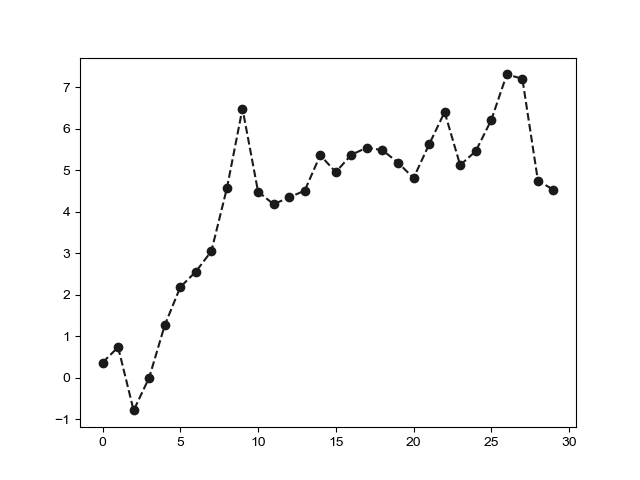

In [19]:
fig = plt.figure()

plt.plot(randn(30).cumsum(), 'ko--')


# alternatively could be written as:
# plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, we can notice that subsequent points are linearly interpolated by default. This can be altered with the __drawstyle__ option

In [20]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


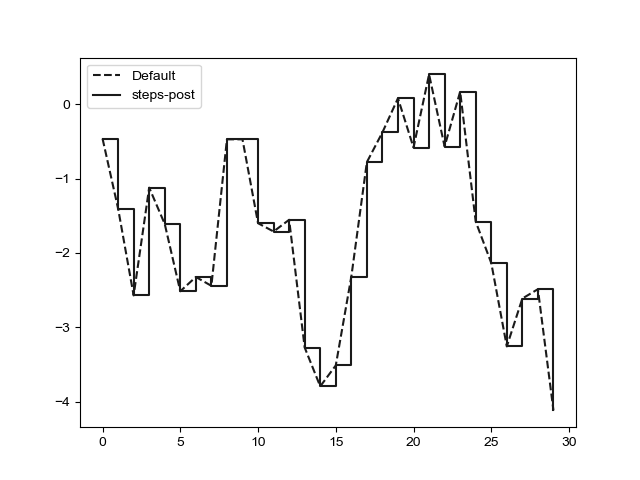

In [21]:
fig = plt.figure()

plt.plot(data, 'k--', label='Default')

plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

plt.legend(loc='best')

Here, since we passed the __label__ arguments to __plot__, we are able to create a plot legend to identify each line using
__plt.legend__.

<span style='color:red'>Note:</span> we must call plt.legend (or ax.legend, if we can reference to
the axes) to create the legend, whether or not we passed the label options when plotting the data.

### Ticks, Labels and Legends

The pyplot interface, designed for interactive use, consists of methods like __xlim__, __xticks__, and __xticklabels__. These control the plot range, tick locations, and tick labels,
respectively. They can be used in two ways:

1. Called with no arguments returns the current parameter value (e.g., plt.xlim() returns the current x-axis plotting range)

2. Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets the x-axis range to 0 to 10)

All such methods act on the active or most recently created AxesSubplot. Each of them corresponds to two methods on the subplot object itself; in the case of __xlim__ these are __ax.get_xlim__ and __ax.set_xlim__

#### Setting the title, axis labels, ticks and ticklabels

<IPython.core.display.Javascript object>


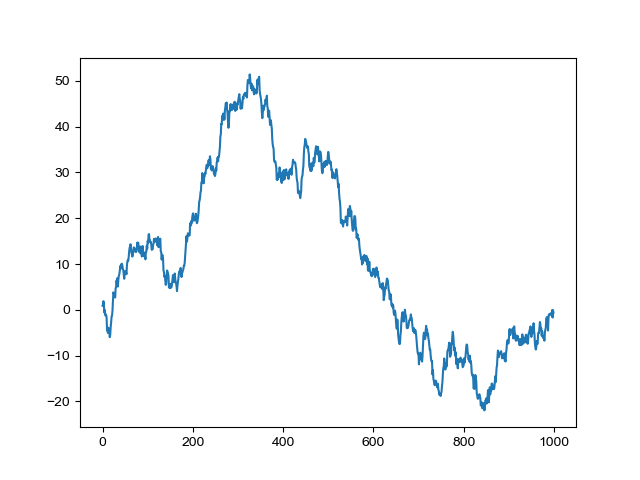

In [22]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

To change the x-axis ticks, it’s easiest to use __set_xticks__ and __set_xticklabels__. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using __set_xticklabels__:

<IPython.core.display.Javascript object>


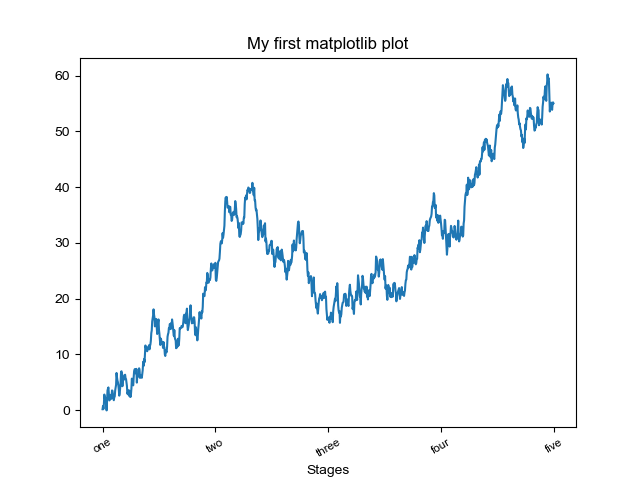

In [23]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [24]:
ax.set_title('Random Number Demonstration')

Text(0.5, 1.0, 'Random Number Demonstration')

In [25]:
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

The __rotation__ option sets the x tick labels at a 30-degree rotation. Lastly, __set_xlabel__
gives a name to the x-axis and __set_title__ gives the subplot a title.

Modifying the y-axis consists of the same process, substituting y for x in the above. The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:

In [26]:
props = {
 'title': 'My first matplotlib plot',
 'xlabel': 'Stages'
}

ax.set(**props)

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

#### Addding Legends

Legends are another critical element for identifying plot elements. There are a couple of ways to add one. The easiest is to pass the label argument when adding each piece of the plot:

In [27]:
from numpy.random import randn

<IPython.core.display.Javascript object>


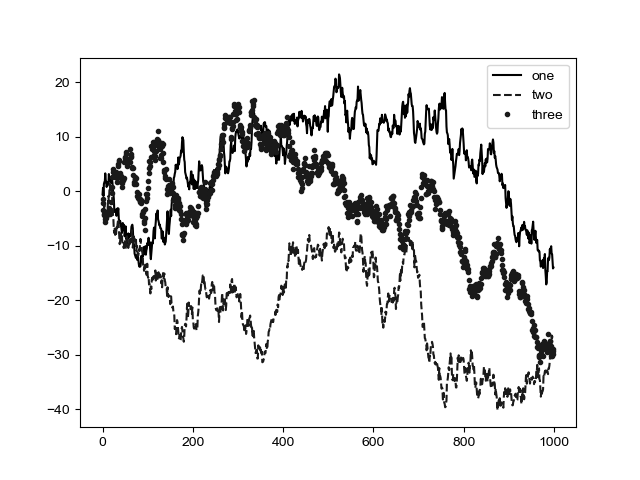

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

Now, we can call either __ax.legend()__ or __plt.legend()__ to automatically create a legend.

In [29]:
ax.legend(loc='best')

The __legend__ method has several other choices for the location __loc__ argument. The loc tells matplotlib where to place the plot. 'best' is a good option as it will choose a location that is most out of the way. To exclude one or more
elements from the legend, pass no label or label='\_nolegend_\' while plotting in ax.plot

### Annotations and Drawing on a Subplot

In addition to the standard plot types, we may wish to draw our own plot annotations, which could consist of text, arrows, or other shapes. we can add annotations and text using the __text__, __arrow__, and __annotate__ functions. __text__ draws text at given coordinates (x, y) on the plot with optional custom styling:

In [30]:
# syntax:

# ax.text(x, y, 'Hello World', family='monospace', fontsize=10)

the __ax.annotate__ method can draw labels at the indicated x and y coordinates.

Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as patches. Some of these, like Rectangle and Circle, are found in matplotlib.pyplot, but the full set is located in matplotlib.patches.

To add a shape to a plot, we create the patch object shp and add it to a subplot by calling ax.add_patch(shp)

<IPython.core.display.Javascript object>


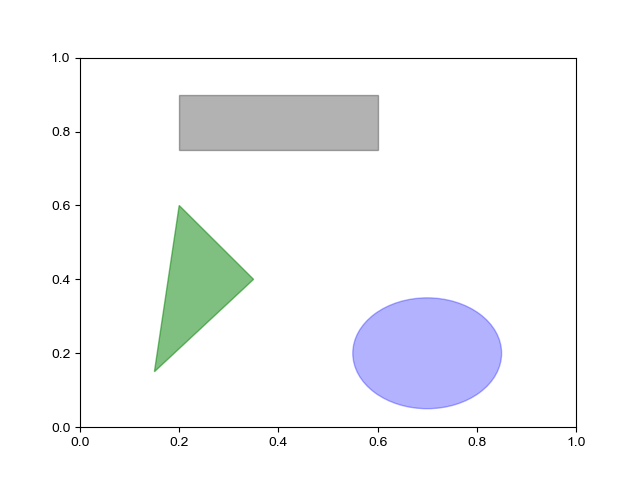

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

We  can save the active figure to file using plt.savefig. This method is equivalent to the figure object’s savefig instance method. For example, to save an SVG version of a figure, we can:

In [32]:
# plt.savefig('figpath.svg')

The file type is inferred from the file extension. So if we used .pdf instead, we would get a PDF

A frequently used standard pratice of important options during saving can be: __dpi__, which controls the dots-per-inch resolution, and __bbox_inches__, which can trim the whitespace around the actual figure. To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI, we would do:

In [33]:
# plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

__savefig__ doesn’t have to write to disk; it can also write to any file-like object, such as a BytesIO. A instance for it like this:

In [34]:
# from io import BytesIO
# buffer = BytesIO()
# plt.savefig(buffer)
# plot_data = buffer.getvalue()

### matplotlib Configuration

matplotlib comes with its own set of default settings for configuration toward preparing figures for publication. but, we can customize almost all the default behaviour via an extensive set of global parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and so on.

One way to modify the configuration programmatically from Python is to use the __rc__ method; for example, to set the global default figure size to be 10 × 10, we could enter:

In [35]:
# plt.rc('figure', figsize=(10, 10))

The first argument to __rc__ is the component we wish to customize, such as __'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend'__, or many others. After that can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options in our program is as a dict:

In [36]:
# font_options = {'family' : 'monospace', 'weight' : 'bold', 'size' : 'small'}
# plt.rc('font', **font_options)

***

## 9.2 Plotting with pandas and seaborn

__matplotlib__ can be fairly low level tool as we have to code from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.

__pandas__ itself has built-in methods that simply creating isualization from DataFrame and Series objects. Another popular library for plotting is __seaborn__, a statistical graphics library that simplifies creating many common visualization types. 

<span style='color:red'>Note:</span>Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if we do not use the seaborn API, we may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots.

### Line Plots

Series and DataFrame each have a plot attribute for making some basic plot types. By default, plot() makes line plots

In [37]:
import pandas as pd

In [38]:
s = pd.Series(randn(10).cumsum(), index=np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


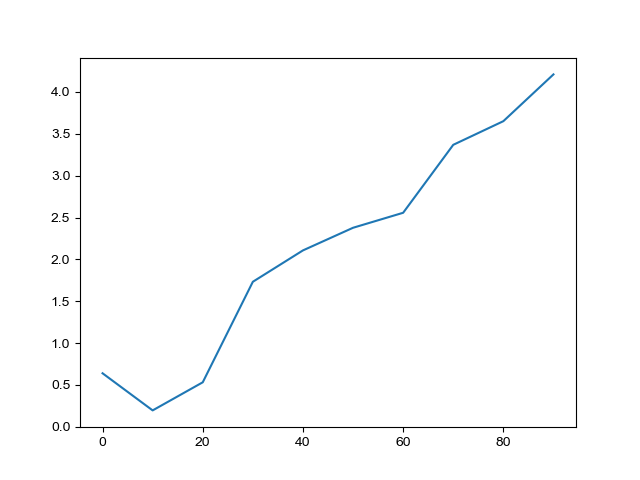

<AxesSubplot:>

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

s.plot()

The Series object’s index is passed to matplotlib for plotting on the x-axis, though we can disable this by passing __use_index=False__. The x-axis ticks and limits can be adjusted with the __xticks__ and __xlim__ options, and y-axis respectively with __yticks__ and __ylim__.

DataFrame’s __plot__ method plots each of its columns as a different line on the same subplot, creating a legend automatically

<IPython.core.display.Javascript object>


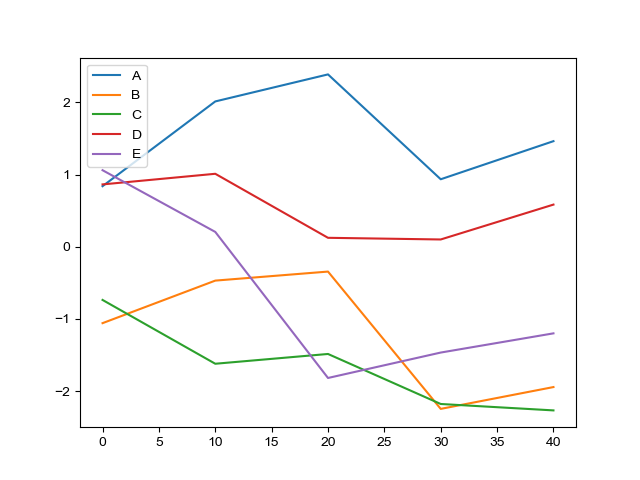

<AxesSubplot:>

In [40]:
df = pd.DataFrame(randn(5, 5).cumsum(0), columns=list('ABCDE'), index=np.arange(0, 50, 10))

df.plot()

### Bar Plots

The __plot.bar()__ and __plot.barh()__ make vertical and horizontal bar plots, respectively. In this case, the Series or DataFrame index will be used as the x __(bar)__ or y __(barh)__ ticks

<IPython.core.display.Javascript object>


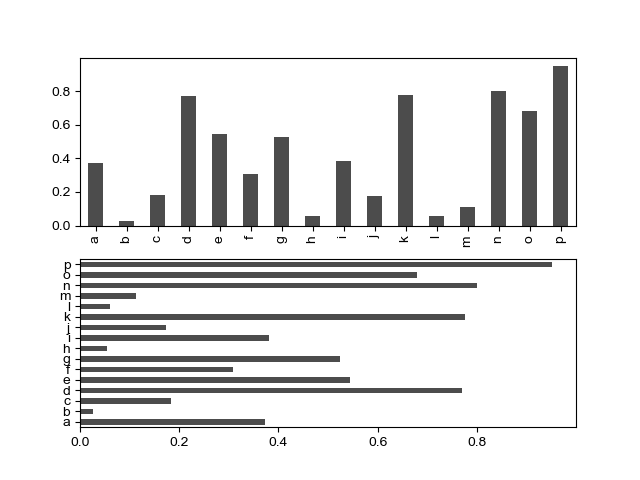

<AxesSubplot:>

In [41]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

The options __color='k'__ and __alpha=0.7__ set the color of the plots to black and use partial transparency on the filling.

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value. 

In [42]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [43]:
df

Genus,A,B,C,D
one,0.881167,0.601666,0.162261,0.972686
two,0.669146,0.018077,0.259562,0.190685
three,0.545653,0.651035,0.001917,0.767283
four,0.039386,0.571533,0.615177,0.813677
five,0.627006,0.928637,0.233617,0.649510
six,0.838313,0.649730,0.916274,0.454546


<IPython.core.display.Javascript object>


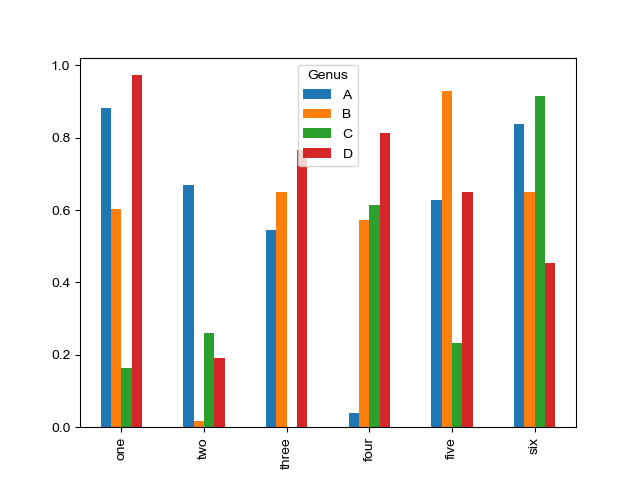

<AxesSubplot:>

In [44]:
df.plot.bar()

<span style='color:red'>Note:</span> The name “Genus” on the DataFrame’s columns is used to title the legend.

To create a stacked bar plots from a DataFrame, we can pass __stacked=True__, resulting in the value in each row being stacked together.

<IPython.core.display.Javascript object>


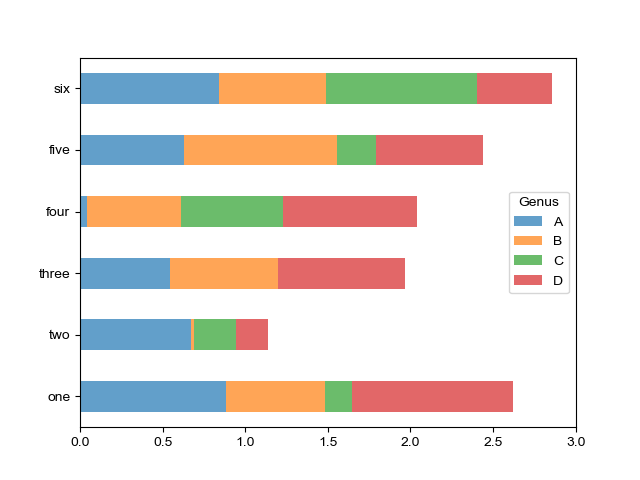

<AxesSubplot:>

In [45]:
df.plot.barh(stacked=True, alpha=0.7)

Now, lets look into a __'tip' dataset__, to make a stacked bar plot showing the percentage of data points for each party size on each day. Let's  load the data using __read_csv__ and make a cross-tabulation by day and party size:

In [46]:
tips = pd.read_csv('example dataset/tips.csv')

In [47]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [48]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [49]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [50]:
# atleast 2 people and at max 6 person for the party to be held.

party_counts = party_counts.loc[:, 2:5]

Then, normalize so that each row sums to 1 and make the plot

In [51]:
 party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [52]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


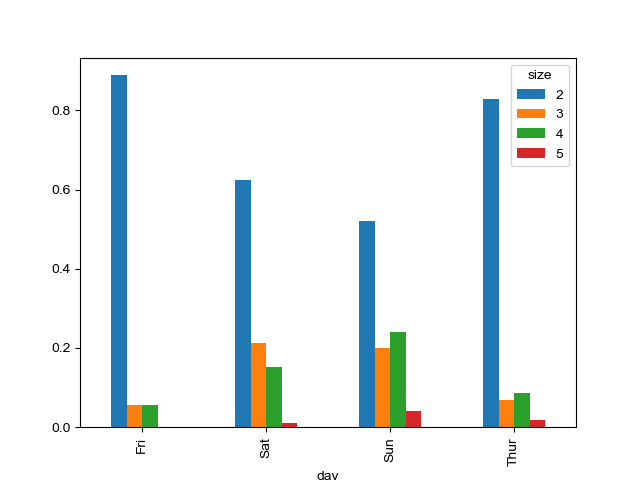

<AxesSubplot:xlabel='day'>

In [53]:
party_pcts.plot.bar()

So we can see that party sizes appear to increase on the weekend in this dataset.

With data that requires aggregation or summarization before making a plot, using the __seaborn__ package can make things much simpler. Let’s look now at the tipping percentage by day with seaborn

In [54]:
import seaborn as sns

In [55]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [56]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


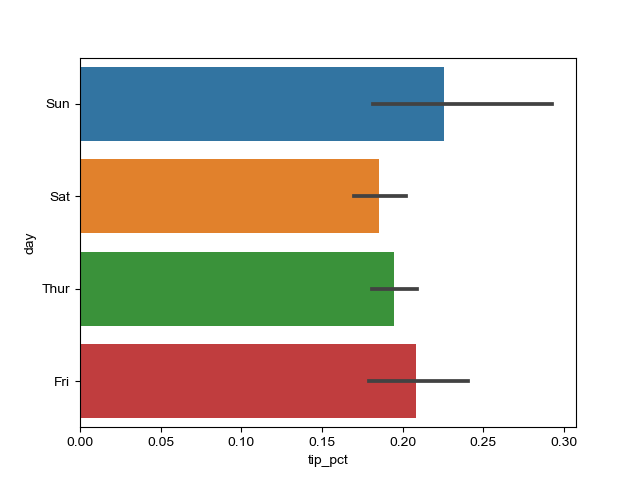

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting functions in seaborn take a __data__ argument, which can be a pandas DataFrame. The other arguments refer to column names. Because there are multiple observations for each value in the day, the bars are the average value of __tip_pct__. The black lines drawn on the bars represent the 95% confidence interval (this can be configured through optional arguments).

__seaborn.barplot__ has a __hue__ option that enables us to split by an additional categorical value

<IPython.core.display.Javascript object>


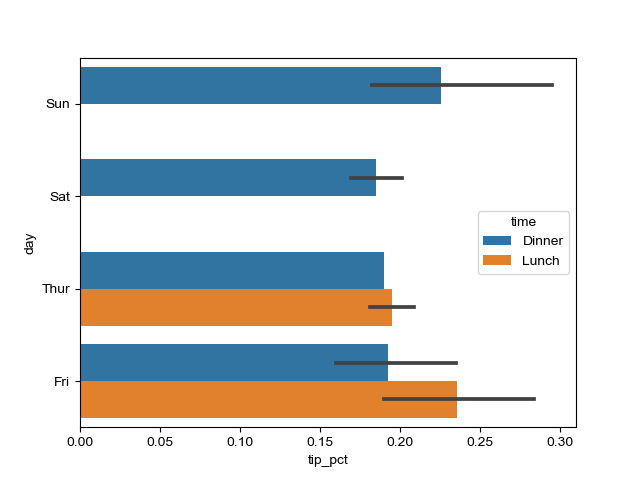

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [58]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. we can switch between different plot appearances using __seaborn.set__:

In [59]:
sns.set(style='whitegrid')

### Histograms and Density Plots

A histogram is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. Using the tipping data from before, we can make a histogram of tip percentages of the total bill using the plot.hist method on the Series

<IPython.core.display.Javascript object>


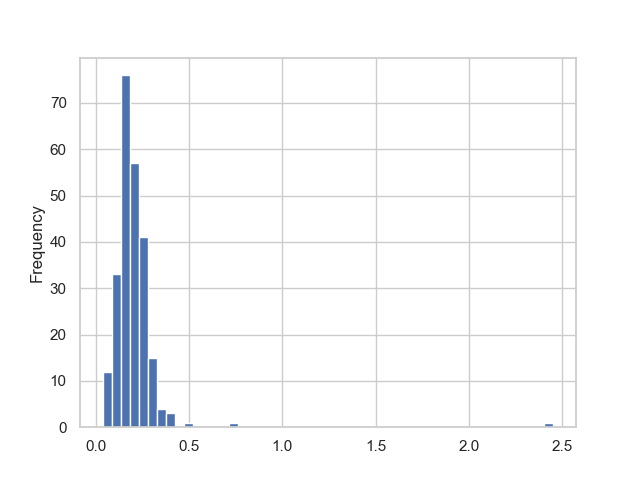

<AxesSubplot:ylabel='Frequency'>

In [60]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

tips['tip_pct'].plot.hist(bins=50)

A related plot type is a __density plot__, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as a mixture of “kernels”—that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. 

Using __plot.kde__ makes a density plot using the conventional mixture-of-normals estimate

<IPython.core.display.Javascript object>


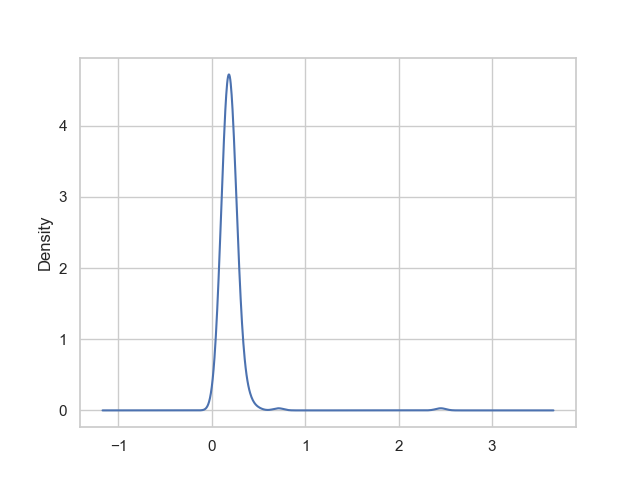

<AxesSubplot:ylabel='Density'>

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its __distplot__ method, which can plot both a histogram and a continuous density estimate simultaneously. As an example, consider a bimodal distribution consisting of draws from two different standard normal distributions

In [62]:
comp1 = np.random.normal(0, 1, size=200)

comp2 = np.random.normal(10, 2, size=200)

In [63]:
values = pd.Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


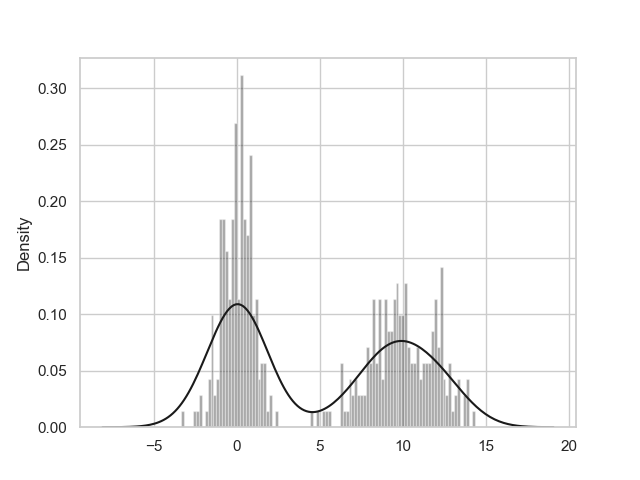

C:\Users\tojoi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [76]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series

Lets take a __macrodata__ dataset then select a few variables to compute the log differences as an example demonstration:

In [65]:
macro = pd.read_csv('example dataset/macrodata.csv')

In [66]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [67]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [68]:
trans_data = np.log(data).diff().dropna()

In [69]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


We can then use seaborn’s __regplot__ method, which makes a scatter plot and fits a linear regression line

<IPython.core.display.Javascript object>


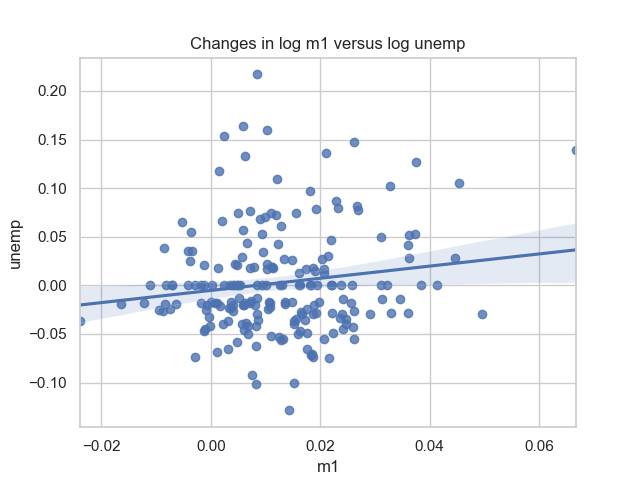

<AxesSubplot:xlabel='m1', ylabel='unemp'>

In [70]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

sns.regplot(x='m1', y='unemp', data=trans_data)

In [71]:
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a __pairs plot__ or __scatter plot matrix__. Making such a plot from scratch is a bit of work, so seaborn has a convenient __pairplot__ function, which supports placing histograms or density estimates of each variable along the diagonal

<IPython.core.display.Javascript object>


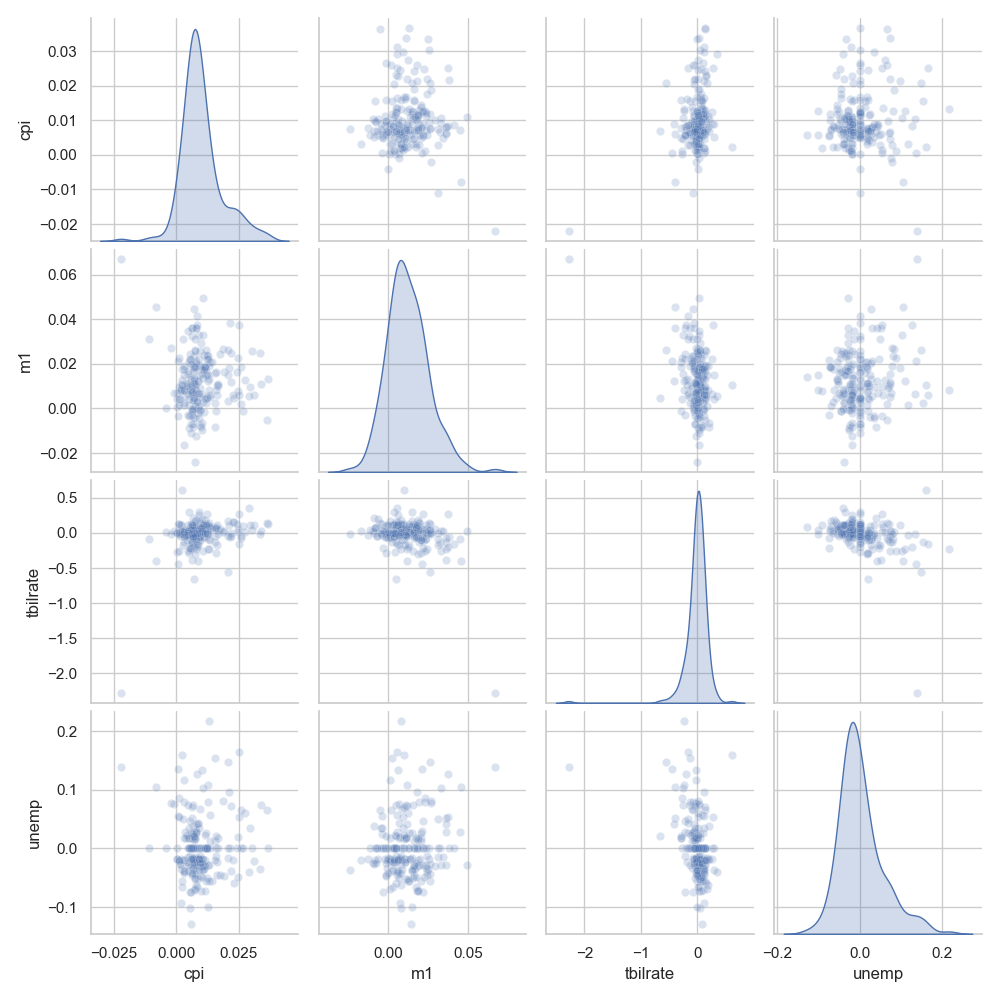

In [72]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

__plot_kws__ argument enables us to pass down configuration options to the individual plotting calls on the off-diagonal elements.

### Facet Grids and Categorical Data

One way to visualize data with many categorical variables is to use a __facet grid__. Seaborn has a useful built-in function __catplot__ that simplifies making many kinds of faceted plots 

<IPython.core.display.Javascript object>


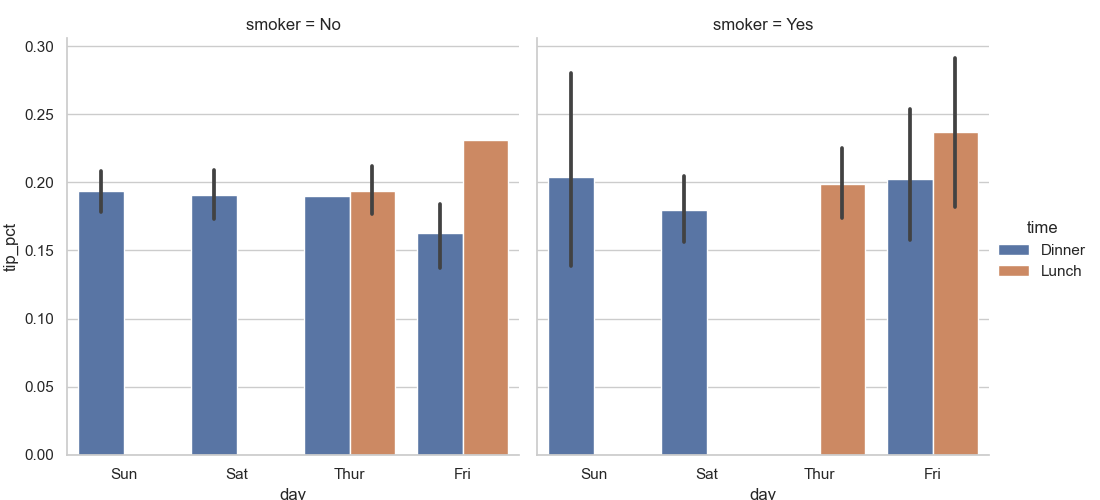

In [73]:
#UserWarning: The `factorplot` function has been renamed to `catplot`. 
#The original name will be removed in a future release. Please update your code. 
#Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

Instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per time value

<IPython.core.display.Javascript object>


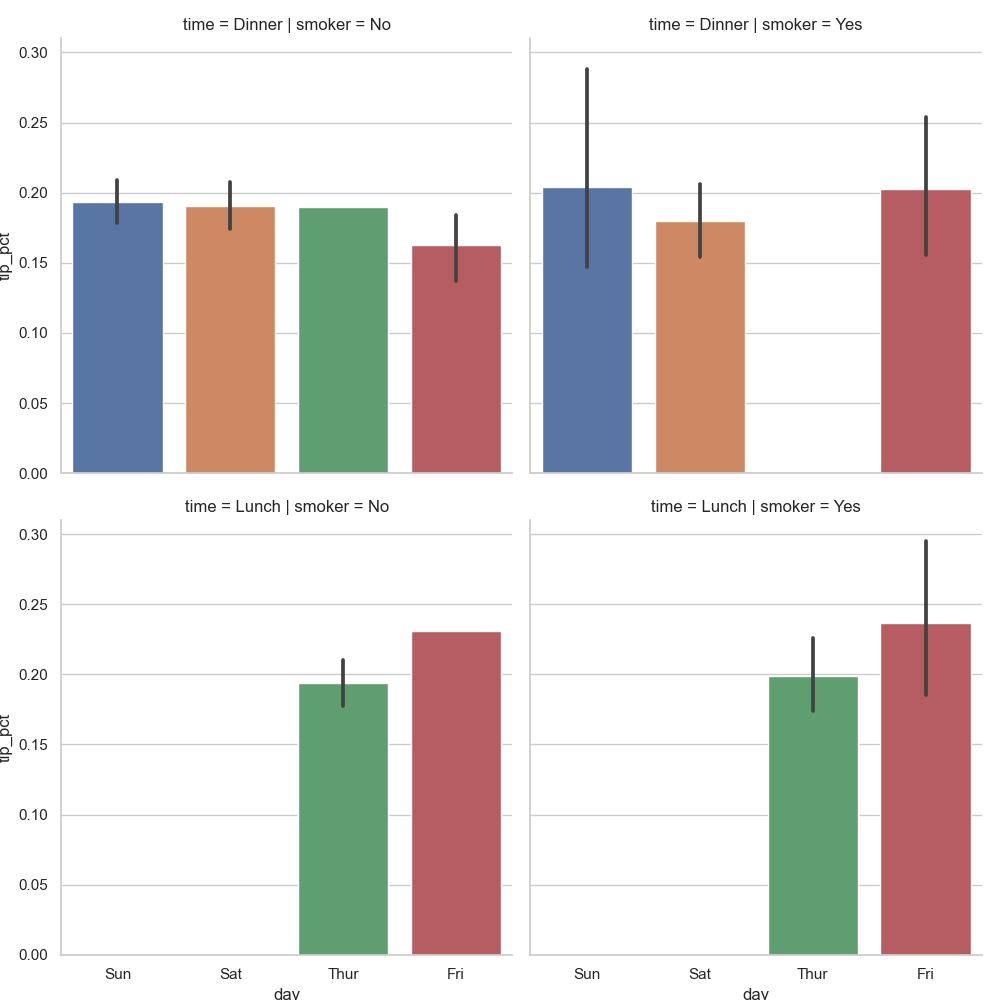

In [74]:
sns.catplot(x='day', y='tip_pct', row='time',
               col='smoker', 
               kind='bar', data=tips[tips.tip_pct < 1])

__catplot__ also supports box plots (which show the median, quartiles, and out‐ liers) can be an effective visualization type:

<IPython.core.display.Javascript object>


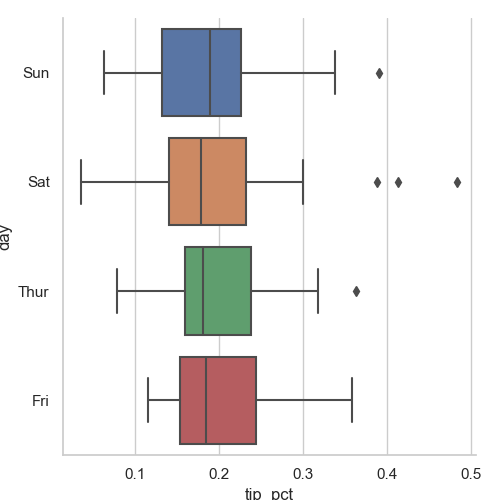

In [75]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

***

#### <span style='color:red'>Note:</span> Always refer to official documentations of any library or packages for latest update and changes in the code.